In [5]:
import pandas as pd
from unidecode import unidecode
import re
import ast
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
import warnings

#Suppress all warnings
warnings.filterwarnings("ignore")


In [7]:
# Remove accents with unidecode
def remove_accents(text):
    if isinstance(text, str):
        return unidecode(text)
    return text

## PRE-OWNED

In [8]:
pre = pd.read_csv("/Users/admin/Desktop/IRONHACK/8.WEEK/final_project/notebooks/datos/final_categorias/pre-owned-zara.csv")

pre.reset_index(inplace = True)
pre.drop(columns=['Unnamed: 0'], inplace=True)

# Aplicar la función a todo el DataFrame
pre = pre.applymap(remove_accents)

In [9]:
pre.head()

,index,product_name,price,detail,year_purchase
0,0,VESTIDO CUADRO VICHY,"14,00 EUR",['Como nuevo'],2022
1,1,ZAPATO DESTALONADO ACHAROLADO PULSERAS,"29,95 EUR",['Nuevo con etiquetas'],2023
2,2,CAMISETA RIB TIRANTES,"9,00 EUR",['Como nuevo'],2023
3,3,PANTALON FALDA PLISADA,"10,00 EUR",['Como nuevo'],2020
4,4,PANUELO ESTAMPADO FLORAL,"9,9 EUR",['Como nuevo'],


#### Column Product_name: 

In [10]:
pre['product_name'] = pre['product_name'].str.title()
pre['product_name'] = pre['product_name'].apply(lambda x: x.ljust(15))
pre = pre.applymap(lambda x: f'{x:<50}' if isinstance(x, str) else x)

In [11]:
pre.head()

,index,product_name,price,detail,year_purchase
0,0,Vestido Cuadro Vichy ...,"14,00 EUR ...",['Como nuevo'] ...,2022 ...
1,1,Zapato Destalonado Acharolado Pulseras ...,"29,95 EUR ...",['Nuevo con etiquetas'] ...,2023 ...
2,2,Camiseta Rib Tirantes ...,"9,00 EUR ...",['Como nuevo'] ...,2023 ...
3,3,Pantalon Falda Plisada ...,"10,00 EUR ...",['Como nuevo'] ...,2020 ...
4,4,Panuelo Estampado Floral ...,"9,9 EUR ...",['Como nuevo'] ...,...


In [12]:
patt_po = { r"[Vv]estido" : "Vestido",
            r"[Mm]ono" : "Mono",
            r"[Tt]op" : "Top",
            r"[Cc]amisa" : "Camisa",
            r"[Pp]antalon" : "Pantalon", 
            r"[Jj]eans" : "Jeans", 
            r"[Bb]olso" : "Bolso", 
            r"[Ss]andalia" : "Calzado",
            r"[Zz]apatillas" : "Calzado",
            r"[Mm]ocasin" : "Calzado",
            r"[Cc]haqueta" : "Chaqueta", 
            r"[Pp]arka" : "Chaqueta", 
            r"[Aa]norak" : "Chaqueta",
            r"[Cc]azadora" : "Chaqueta",
            r"[Jj]ersey" : "Jersey", 
            r"[Ff]alda" : "Falda",
            r"[Bb]lazer" : "Blazer", 
            r"[Cc]amiseta": "Camiseta"
          }

In [13]:
def categorize_activities(text, patt_po):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in patt_po.items():
            if re.search(pattern, text):
                return category
    return "Otros"  # If it does not match any category, "Other" is returned.

In [14]:
# Clear invalid values in the "activity" column
pre["product_name"] = pre["product_name"].fillna("empty")  # Fill NaN values with an empty string
pre["product_name"] = pre["product_name"].astype(str)  # Convert all values to text strings
# Apply the function to categorize activities
pre["product_name"] = pre["product_name"].apply(lambda x: categorize_activities(x, patt_po))
pre["product_name"].unique()

array(['Vestido', 'Otros', 'Camiseta', 'Pantalon', 'Bolso', 'Jeans',
       'Calzado', 'Mono', 'Top', 'Falda', 'Jersey', 'Camisa', 'Chaqueta',
       'Blazer'], dtype=object)

In [15]:
pre["product_name"].value_counts()

product_name
Vestido     60
Otros       56
Top         30
Calzado     27
Falda       20
Pantalon    18
Bolso       17
Jeans       13
Camiseta     6
Chaqueta     6
Mono         5
Blazer       4
Camisa       3
Jersey       2
Name: count, dtype: int64

#### Column Price: 

In [16]:
def remove_currency(df):
    df["price"] = df["price"].replace("EUR", "", regex=True)
    return df

In [17]:
remove = remove_currency(pre)

In [18]:
pre.head()

,index,product_name,price,detail,year_purchase
0,0,Vestido,"14,00",['Como nuevo'] ...,2022 ...
1,1,Otros,"29,95",['Nuevo con etiquetas'] ...,2023 ...
2,2,Camiseta,"9,00",['Como nuevo'] ...,2023 ...
3,3,Pantalon,"10,00",['Como nuevo'] ...,2020 ...
4,4,Otros,"9,9",['Como nuevo'] ...,...


#### Column detail

In [19]:
def clean_text(text):
    return re.sub(r"[\[\]']", "", text)

In [20]:
pre['detail'] = pre['detail'].apply(clean_text)

In [21]:
pre.head()

,index,product_name,price,detail,year_purchase
0,0,Vestido,"14,00",Como nuevo,2022 ...
1,1,Otros,"29,95",Nuevo con etiquetas,2023 ...
2,2,Camiseta,"9,00",Como nuevo,2023 ...
3,3,Pantalon,"10,00",Como nuevo,2020 ...
4,4,Otros,"9,9",Como nuevo,...


In [22]:
pre["year_purchase"].value_counts()

year_purchase
                                                      143
 2023                                                  81
 2022                                                  17
 2024                                                  16
 2021                                                   4
 2020                                                   3
 2019                                                   1
 2018                                                   1
 2017                                                   1
Name: count, dtype: int64

In [23]:
#pre['price'] = pre['price'].replace(r'^\s*$', np.nan, regex=True)

In [24]:
#pre['price'] = pd.to_numeric(pre['price'], errors='coerce')

In [25]:
null_counts = pre.isnull().sum()
null_counts

index            0
product_name     0
price            0
detail           0
year_purchase    0
dtype: int64

In [26]:
pre.head()

,index,product_name,price,detail,year_purchase
0,0,Vestido,"14,00",Como nuevo,2022 ...
1,1,Otros,"29,95",Nuevo con etiquetas,2023 ...
2,2,Camiseta,"9,00",Como nuevo,2023 ...
3,3,Pantalon,"10,00",Como nuevo,2020 ...
4,4,Otros,"9,9",Como nuevo,...


In [27]:
pre.to_csv("pre_owned.csv", index=True)

#### Visualization

In [28]:
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

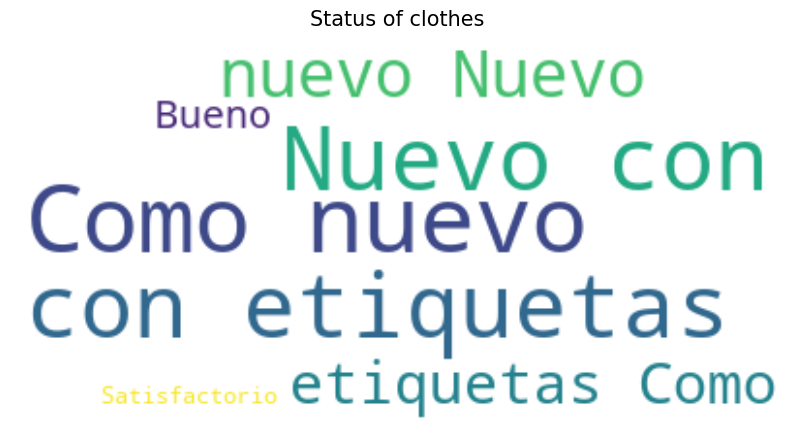

In [29]:
generate_word_cloud(pre['detail'], "Status of clothes")